In [48]:
import sklearn
import shap
from sklearn.model_selection import train_test_split
import warnings
#warnings.filterwarnings('ignore')

In [49]:
# IRIS Dataset target classes:
# 0: setosa
# 1: versicolor
# 2: virginica
# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.3, random_state=0)
print(f'Training set size - X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'Test set size - X_test: {X_train.shape}, Y_train: {Y_test.shape}')

Training set size - X_train: (105, 4), Y_train: (105,)
Test set size - X_test: (105, 4), Y_train: (45,)


In [50]:
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

SVC(probability=True)

In [51]:
explainer = shap.KernelExplainer(model=svm.predict_proba, data=X_train, model_output="probability")

X does not have valid feature names, but SVC was fitted with feature names
Using 105 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [52]:
shap_values = explainer.shap_values(X=X_test, nsamples=100, l1_reg="num_features(4)")

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


In [53]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 3
Shape of each element: (45, 4)


In [54]:
# plot the SHAP values for the Setosa output of the first instance
import matplotlib.pyplot as plt
print(f'Prediction for 1st sample in X_test: {svm.predict_proba(X_test.iloc[[0], :])[0]}')
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])


Prediction for 1st sample in X_test: [0.01018853 0.02589638 0.9639151 ]


[-0.2562938652718286, -0.04325271198990455]
['petal length (cm)=5.1', 'petal width (cm)=2.4']
['petal width (cm)=2.4', 'petal length (cm)=5.1']


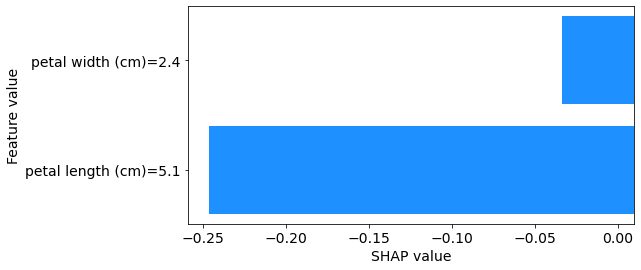

In [55]:
import numpy as np

sv = shap_values[0][0,:]

mapping = dict(zip(X_test.columns.tolist(), list(X_test.iloc[0,:])))
data = list(mapping.values())
key = list(mapping.keys())
arr = []

for i, val in enumerate(key):
    a = val+'='+ str(data[i])
    arr.append(a)

new_sv = []
new_arr = []
for i, val in enumerate(sv):
    isRange = False
    if((0. <= sv[i] <= 0.015) or (0.0 >= sv[i] >= -0.015)):
        isRange = True
    if(sv[i] != 0. and not isRange ):
        new_sv.append(sv[i])
        new_arr.append(arr[i])

print(new_sv)
print(new_arr)

sorted_arr = [x for _,x in sorted(zip(new_sv,new_arr), reverse=True)]
print(sorted_arr)
sorted_sv = sorted(new_sv, reverse=True)

threshold = 0.01

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

color = ['crimson' if e >= 0 else 'dodgerblue' for e in new_sv]

fig, ax = plt.subplots(figsize =(8, 4))

ax.barh(sorted_arr, sorted_sv, color=color, left = threshold)

# ax.annotate('Output SHAP value = 0.00', xy=(threshold,25),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# Show top values
ax.invert_yaxis()
plt.xlabel('SHAP value', fontsize=14)
plt.ylabel('Feature value', fontsize=14)
plt.savefig('irislocal.png' ,bbox_inches='tight')

# Show Plot
plt.show()

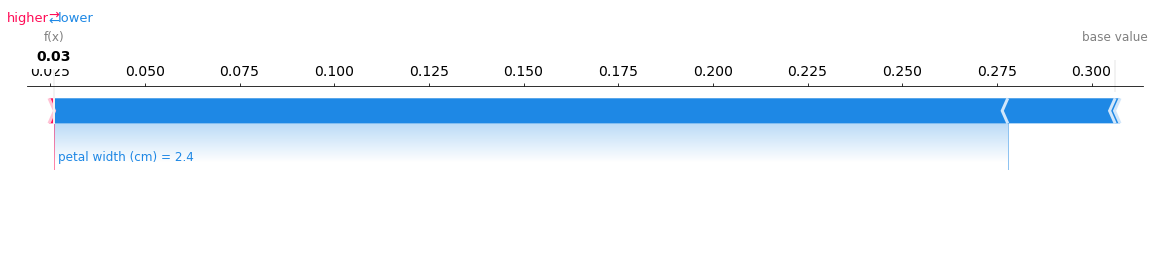

In [57]:
# plot the SHAP values for the Versicolor output of the first instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:],show=False, matplotlib=True)
plt.savefig('forceplot.jpeg')


In [58]:
# plot the SHAP values for the Virginica output of the first instance
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X_test.iloc[0,:])

[0.28464571233313285, 0.2952222593366086]
['petal length (cm)=5.1', 'petal width (cm)=2.4']
['petal width (cm)=2.4', 'petal length (cm)=5.1']


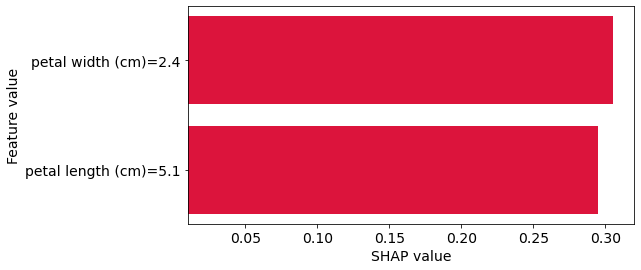

In [59]:


sv = shap_values[2][0,:]

mapping = dict(zip(X_test.columns.tolist(), list(X_test.iloc[0,:])))
data = list(mapping.values())
key = list(mapping.keys())
arr = []

for i, val in enumerate(key):
    a = val+'='+ str(data[i])
    arr.append(a)

new_sv = []
new_arr = []
for i, val in enumerate(sv):
    isRange = False
    if((0. <= sv[i] <= 0.015) or (0.0 >= sv[i] >= -0.015)):
        isRange = True
    if(sv[i] != 0. and not isRange ):
        new_sv.append(sv[i])
        new_arr.append(arr[i])

print(new_sv)
print(new_arr)

sorted_arr = [x for _,x in sorted(zip(new_sv,new_arr), reverse=True)]
print(sorted_arr)
sorted_sv = sorted(new_sv, reverse=True)

threshold = 0.01

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

color = ['crimson' if e >= 0 else 'dodgerblue' for e in new_sv]

fig, ax = plt.subplots(figsize =(8, 4))

ax.barh(sorted_arr, sorted_sv, color=color, left = threshold)

# ax.annotate('Output SHAP value = 0.00', xy=(threshold,25),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# Show top values
ax.invert_yaxis()
plt.xlabel('SHAP value', fontsize=14)
plt.ylabel('Feature value', fontsize=14)
plt.savefig('irisvirginicalocal.png' ,bbox_inches='tight')

# Show Plot
plt.show()

In [11]:
## Setosa output
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

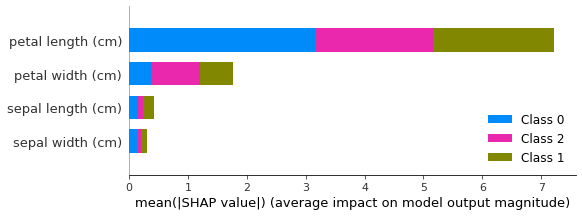

In [12]:
fig = shap.summary_plot(shap_values, X_test,show=False)
plt.savefig('sum.jpeg')

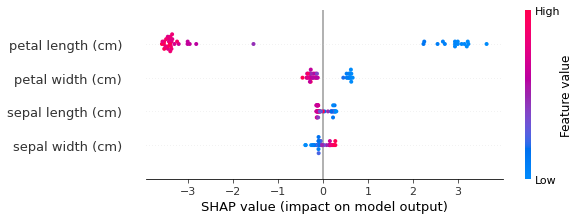

In [13]:
## Setosa output
shap.summary_plot(shap_values[0], X_test)

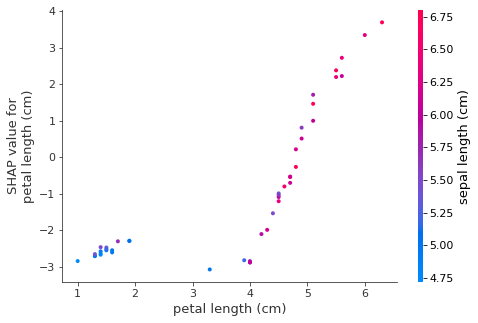

In [14]:
## Virginica output
shap.dependence_plot("petal length (cm)", shap_values[2], X_test)